In [15]:

# coding: utf-8
# Author(s): Haley Botteron

get_ipython().magic(u'matplotlib inline')
import matplotlib.pyplot as plt
import pylab
import numpy as np
import pandas as pd
import csv
from pylab import plot, ylim, xlim, show, xlabel, ylabel, grid

def zeroes_ones(name, threshold):
    filename = name + '_Data.txt'
    with open (filename, 'rb') as datafile:
        data = np.genfromtxt(datafile, delimiter = '\t', names=True,dtype=None)
    Blinks=[]
    time = []
    #not every subject has exact same header so trying to call by comlumn - has an error
    data[:8,]

    for i in range (len(data['false_positive'])):
        if np.any(data['rmse'][i] >= threshold or data['false_negative'][i] == 1):

            if np.any(data['false_positive'][i] == 0):
            # then we're in a blink
                Blinks.append(1)
                time.append(data['time_lined_up'][i])
            else:
                Blinks.append(0)
                time.append(data['time_lined_up'][i])
        else:
            Blinks.append(0)
            time.append(data['time_lined_up'][i])
        if(np.isnan(data['time_lined_up'][i]))==True:
                break

    #  When this finishes, Blinks is a vector in which every entry is a time point when
    #    the eyes are close

    points = zip(time, Blinks)
    with open('Blink-0,1'+name+'.txt', 'w') as f:
        writer = csv.writer(f)
        writer.writerows(points)



def resample_blinks(name, fps):
    #in .25s blocks, create a fraction of how many points were spent in blink for 60fps its i =15
    filename = 'Blink-0,1'+name+'.txt'
    with open (filename, 'rb') as datafile:
        data = np.genfromtxt(datafile, delimiter = ',')
        filename1 = 'zscore' + name +'.txt'
        with open (filename1, 'rb') as datafile:
            ratings = np.genfromtxt(datafile, delimiter = ',')
        print(data.shape)
        print(ratings.shape)

        avgX = []
        avgY= []

        ratings_new = np.transpose(ratings)

        import matplotlib.pyplot as plt
        from scipy.interpolate import UnivariateSpline
        print ('ratingsnew shape',ratings_new.shape)
        spl = UnivariateSpline(ratings_new[0], ratings_new[1])
        xs = np.linspace(.1250, 450.1250, 1800)
        spl.set_smoothing_factor(0.1)

        add = .125
        for i in range(450):
            block1 = []
            block2 = []
            block3 = []
            block4 = []
            timeblock1 = []
            timeblock2 = []
            timeblock3 = []
            timeblock4 = []
            count1 =0.0
            count2 =0.0
            count3 =0.0
            count4 =0.0
            for m in range (len(data)):

                if data[m][0]>=i and data[m][0] < i+.25:
                    timeblock1.append(i+.125)
                    if data[m][1] == 1:
                        block1.append(1)
                        count1 = count1 +1.0

                    else:
                        count1 = count1 +1.0
                        continue
                if data[m][0] >= i+.25 and data[m][0]< i+.5:
                    timeblock2.append(i+.375)
                    if data[m][1] == 1:
                        block2.append(1)
                        count2 = count2 +1.0
                    else:
                        count2 = count2 +1.0
                        continue
                if data[m][0] >= i+.5 and data[m][0]< i+.75:
                    timeblock3.append(i+.625)
                    if data[m][1] == 1:
                        block3.append(1)
                        count3 = count3 +1.0
                    else:
                        count3 = count3 +1.0
                        continue
                if data[m][0] >= i+.75 and data[m][0]< i+1:
                    timeblock4.append(i+.875)
                    if data[m][1] == 1:
                        block4.append(1)
                        count4 = count4 +1.0
                    else:
                        count4 = count4 +1.0
                        continue

            if fps ==60:
                avgY.append(float(len(block1)/15.0))
                avgY.append(float(len(block2)/15.0))
                avgY.append(float(len(block3)/15.0))
                avgY.append(float(len(block4)/15.0))
            if fps == 30:
                ## Just so i dont get a divide by zero error if there are no values in first indices
                if count1 == 0:
                    count1 =8.0
                if count2 == 0:
                    count2 =8.0
                if count3 == 0:
                    count3 = 8.0
                if count4 == 0:
                    count4 = 8.0

                avgY.append(len(block1)/count1)
                avgY.append(len(block2)/count2)
                avgY.append(len(block3)/count3)
                avgY.append(len(block4)/count4)
            avgX.append(np.average(timeblock1))
            avgX.append(np.average(timeblock2))
            avgX.append(np.average(timeblock3))
            avgX.append(np.average(timeblock4))

            for i in range (len(avgY)):

                if np.isnan(avgX[i])==True:
                    avgX[i]=add
                    avgY[i]= 0.0
                    add = add +.25
        trial1X1=[]
        trial2X1=[]
        trial3X1=[]
        trial4X1=[]
        trial5X1=[]
        trial1Y1=[]
        trial2Y1=[]
        trial3Y1=[]
        trial4Y1=[]
        trial5Y1=[]
        trial1Y2=[]
        trial2Y2=[]
        trial3Y2=[]
        trial4Y2=[]
        trial5Y2=[]
        time = 0;
        # NOTE: (90, 180, 270, 360, 450) include the don't-blink data. Otherwise use 60, 150, 240, 330, 420.

        for i in range (len(avgX)):
            if avgX[i] >0 and avgX[i]<60:
                trial1X1.append(avgX[i])
                trial1Y1.append(avgY[i])
                trial1Y2.append(spl(avgX[i]))
            if avgX[i] >90 and avgX[i]<150:
                time = avgX[i]-90.0
                print (time)
                trial2X1.append(time)
                trial2Y1.append(avgY[i])
                trial2Y2.append(spl(avgX[i]))
            if avgX[i] >180 and avgX[i]<240:
                time =avgX[i]-180.0
                trial3X1.append(time)
                trial3Y1.append(avgY[i])
                trial3Y2.append(spl(avgX[i]))
            if avgX[i] >270 and avgX[i]<330:
                time = avgX[i]-270.0
                trial4X1.append(time)
                trial4Y1.append(avgY[i])
                trial4Y2.append(spl(avgX[i]))
            if avgX[i] >360 and avgX[i]<420:
                time = avgX[i]-360.0
                trial5X1.append(time)
                trial5Y1.append(avgY[i])
                trial5Y2.append(spl(avgX[i]))

        points = zip(trial1X1, trial1Y2, trial1X1, trial1Y1)
        with open('ResampledBlinks'+name+'_Trial1.txt', 'w') as f:
            writer = csv.writer(f, delimiter='\t')
            writer.writerows(points)
        points = zip(trial2X1, trial2Y2, trial2X1, trial2Y1)
        with open('ResampledBlinks'+name+'_Trial2.txt', 'w') as f:
            writer = csv.writer(f, delimiter='\t')
            writer.writerows(points)
        points = zip(trial3X1, trial3Y2, trial3X1, trial3Y1)
        with open('ResampledBlinks'+name+'_Trial3.txt', 'w') as f:
            writer = csv.writer(f, delimiter='\t')
            writer.writerows(points)
        points = zip(trial4X1, trial4Y2, trial4X1, trial4Y1)
        with open('ResampledBlinks'+name+'_Trial4.txt', 'w') as f:
            writer = csv.writer(f, delimiter='\t')
            writer.writerows(points)
        points = zip(trial5X1, trial5Y2, trial5X1, trial5Y1)
        with open('ResampledBlinks'+name+'_Trial5.txt', 'w') as f:
            writer = csv.writer(f, delimiter='\t')
            writer.writerows(points)


def resample_blinks_withOK(name, fps):
    #in .25s blocks, create a fraction of how many points were spent in blink for 60fps its i =15
    filename = 'Blink-0,1'+name+'.txt'
    with open (filename, 'rb') as datafile:
        data = np.genfromtxt(datafile, delimiter = ',')
        filename1 = 'zscore' + name +'.txt'
        with open (filename1, 'rb') as datafile:
            ratings = np.genfromtxt(datafile, delimiter = ',')
        print (data.shape)
        print (ratings.shape)

        avgX = []
        avgY= []

        ratings_new = np.transpose(ratings)

        import matplotlib.pyplot as plt
        from scipy.interpolate import UnivariateSpline
        print ('ratingsnew shape',ratings_new.shape)
        spl = UnivariateSpline(ratings_new[0], ratings_new[1])
        xs = np.linspace(.1250, 450.1250, 1800)
        spl.set_smoothing_factor(0.1)

        add = .125
        for i in range(450):
            block1 = []
            block2 = []
            block3 = []
            block4 = []
            timeblock1 = []
            timeblock2 = []
            timeblock3 = []
            timeblock4 = []
            count1 =0.0
            count2 =0.0
            count3 =0.0
            count4 =0.0
            for m in range (len(data)):

                if data[m][0]>=i and data[m][0] < i+.25:
                    timeblock1.append(i+.125)
                    if data[m][1] == 1:
                        block1.append(1)
                        count1 = count1 +1.0

                    else:
                        count1 = count1 +1.0
                        continue
                if data[m][0] >= i+.25 and data[m][0]< i+.5:
                    timeblock2.append(i+.375)
                    if data[m][1] == 1:
                        block2.append(1)
                        count2 = count2 +1.0
                    else:
                        count2 = count2 +1.0
                        continue
                if data[m][0] >= i+.5 and data[m][0]< i+.75:
                    timeblock3.append(i+.625)
                    if data[m][1] == 1:
                        block3.append(1)
                        count3 = count3 +1.0
                    else:
                        count3 = count3 +1.0
                        continue
                if data[m][0] >= i+.75 and data[m][0]< i+1:
                    timeblock4.append(i+.875)
                    if data[m][1] == 1:
                        block4.append(1)
                        count4 = count4 +1.0
                    else:
                        count4 = count4 +1.0
                        continue

            if fps ==60:
                avgY.append(float(len(block1)/15.0))
                avgY.append(float(len(block2)/15.0))
                avgY.append(float(len(block3)/15.0))
                avgY.append(float(len(block4)/15.0))
            if fps == 30:
                ## Just so i dont get a divide by zero error if there are no values in first indices
                if count1 == 0:
                    count1 =8.0
                if count2 == 0:
                    count2 =8.0
                if count3 == 0:
                    count3 = 8.0
                if count4 == 0:
                    count4 = 8.0

                avgY.append(len(block1)/count1)
                avgY.append(len(block2)/count2)
                avgY.append(len(block3)/count3)
                avgY.append(len(block4)/count4)
            avgX.append(np.average(timeblock1))
            avgX.append(np.average(timeblock2))
            avgX.append(np.average(timeblock3))
            avgX.append(np.average(timeblock4))
            for i in range (len(avgY)):

                if np.isnan(avgX[i])==True:
                    avgX[i]=add
                    avgY[i]= 0.0
                    add = add +.25
        #print block1
        trial1X1=[]
        trial2X1=[]
        trial3X1=[]
        trial4X1=[]
        trial5X1=[]
        trial1Y1=[]
        trial2Y1=[]
        trial3Y1=[]
        trial4Y1=[]
        trial5Y1=[]
        trial1Y2=[]
        trial2Y2=[]
        trial3Y2=[]
        trial4Y2=[]
        trial5Y2=[]
        time = 0;
        # NOTE: (90, 180, 270, 360, 450) include the don't-blink data. Otherwise use 60, 150, 240, 330, 420.

        for i in range (len(avgX)):
            if avgX[i] >0 and avgX[i]<90:
                trial1X1.append(avgX[i])
                trial1Y1.append(avgY[i])
                trial1Y2.append(spl(avgX[i]))
            if avgX[i] >90 and avgX[i]<180:
                time = avgX[i]-90.0
                print (time)
                trial2X1.append(time)
                trial2Y1.append(avgY[i])
                trial2Y2.append(spl(avgX[i]))
            if avgX[i] >180 and avgX[i]<270:
                time =avgX[i]-180.0
                trial3X1.append(time)
                trial3Y1.append(avgY[i])
                trial3Y2.append(spl(avgX[i]))
            if avgX[i] >270 and avgX[i]<360:
                time = avgX[i]-270.0
                trial4X1.append(time)
                trial4Y1.append(avgY[i])
                trial4Y2.append(spl(avgX[i]))
            if avgX[i] >360 and avgX[i]<450:
                time = avgX[i]-360.0
                trial5X1.append(time)
                trial5Y1.append(avgY[i])
                trial5Y2.append(spl(avgX[i]))

        #print (avgX[:25])
        #print (avgY[:25])

        points = zip(trial1X1, trial1Y2, trial1X1, trial1Y1)
        with open('ResampledBlinks'+name+'_Trial1OK.txt', 'w') as f:
            writer = csv.writer(f, delimiter='\t')
            writer.writerows(points)
        points = zip(trial2X1, trial2Y2, trial2X1, trial2Y1)
        with open('ResampledBlinks'+name+'_Trial2OK.txt', 'w') as f:
            writer = csv.writer(f, delimiter='\t')
            writer.writerows(points)
        points = zip(trial3X1, trial3Y2, trial3X1, trial3Y1)
        with open('ResampledBlinks'+name+'_Trial3OK.txt', 'w') as f:
            writer = csv.writer(f, delimiter='\t')
            writer.writerows(points)
        points = zip(trial4X1, trial4Y2, trial4X1, trial4Y1)
        with open('ResampledBlinks'+name+'_Trial4OK.txt', 'w') as f:
            writer = csv.writer(f, delimiter='\t')
            writer.writerows(points)
        points = zip(trial5X1, trial5Y2, trial5X1, trial5Y1)
        with open('ResampledBlinks'+name+'_Trial5OK.txt', 'w') as f:
            writer = csv.writer(f, delimiter='\t')
            writer.writerows(points)


NameError: name 'points' is not defined

In [5]:
# Author(s): Haley Acevedo
import json
import numpy as np
import pandas as pd
import re

from os import listdir

x_interp = np.arange(0, 90, .6)
x_data = np.arange(0, 90, .25)

def create_df(rows, label):
    column_names = ['subject', 'trial'] + [ 'frame' + str(x) for x in range(1, len(rows[0])-1) ]
    df = pd.DataFrame(rows, columns=column_names).set_index(['subject', 'trial']).sort_index()
    df.to_csv('{}_discomfort_trials.csv'.format(label))
    return df


def interpolate_data(y):
    return [ str(x) for x in np.interp(x_interp, x_data, y).tolist() ]


def write_fidl_file(row):
    fidl_file = '{}_avg_discomfort.ext'.format(row.name)
    avg_trial = [ str(x) for x in list(row.values) ]
    with open(fidl_file, 'w') as f:
        run_discomfort = [avg_trial[0]] *50 + avg_trial*4 # initial 30s rest (with initial value of discomfort curve) + 4 concatenated discomfort curves
        f.write('\n'.join(['discomfort'] + run_discomfort*2)) # write label and two runs worth of discomfort curves
    return row


blink_trials = { re.search('(ResampledBlinks(TM\d{3})_Trial(\d)OK.txt)', f) for f in listdir('C:\\Users\\kevin\\Documents\\SourceTree\\blink-TS\\data') }
blink_trials = { x.groups() for x in blink_trials if x }

orig_rows = []
eye_closure_rows = []
resamp_rows = []
for trial_info in blink_trials:
    y = np.genfromtxt(trial_info[0], usecols=1)
    y_resamp = interpolate_data(y)
    index_cols = [trial_info[1], trial_info[2]]
    orig_rows.append(index_cols + list(y))
    eye_closure_rows.append(index_cols + list(np.genfromtxt(trial_info[0], usecols=3)))
    resamp_rows.append(index_cols + y_resamp)

In [56]:
#listdir('C:\\Users\\kevin\\Documents\\SourceTree\\blink-TS\\data')
#%pwd
#%ls TM107Ratings.txt
x_data = np.arange(0, 90, .25)
data = np.genfromtxt('TM107Ratings.txt', names=True, delimiter="\t")
print(data)
test = np.interp(x_data, data[0], data[1]).tolist()
print(test)

[(0.00000e+00, nan, 0.442043, 0.491159)
 (2.66000e-01, nan, 0.442043, 0.491159)
 (5.32000e-01, nan, 0.46169 , 0.512988) ...
 (4.49448e+02, nan, 0.43222 , 0.480244)
 (4.49714e+02, nan, 0.43222 , 0.480244)
 (4.49980e+02, nan, 0.43222 , 0.480244)]


ValueError: object of too small depth for desired array

In [4]:
resamp_df = create_df(resamp_rows, 'resampled')
orig_df = create_df(orig_rows, 'original')
eye_closure_rows = create_df(eye_closure_rows, 'eye_closure')

frame_cols = [col for col in resamp_df.columns if col.startswith('frame')]
resamp_df[frame_cols] = resamp_df[frame_cols].astype(float)
avg_df = resamp_df.groupby('subject')[frame_cols].mean()
avg_df.to_csv('average_dicomfort_curves.csv')
avg_df.apply(write_fidl_file, axis=1)

IndexError: list index out of range

In [20]:

# coding: utf-8
# Author(s): Haley Botteron


import numpy as np
get_ipython().magic(u'matplotlib inline')
import matplotlib.pyplot as plt
import pylab
from pylab import plot, ylim, xlim, show, xlabel, ylabel, grid
import csv

def zscore(name):
    filename=  name + 'Ratings.txt'
    with open (filename, 'rb') as datafile:
        Urge = []

        ratings = np.genfromtxt(datafile, delimiter = '\t', names=True,dtype=None)
        for i in range (len(ratings['block'])-1):
                Urge.append(ratings['discomfort'][i])
        SD = np.std(Urge)
        print (SD)
        Avg = np.average(Urge)
        z = []
        for i in range (len(ratings['block'])):
                zScore = ((ratings['discomfort'][i]) - Avg)/ SD
                z.append(zScore)
    print (SD, Avg)

    points = zip(ratings['time'], z)
    with open('zscore'+name+'.txt', 'w') as f:
        writer = csv.writer(f)
        writer.writerows(points)

    #plot to visualize
    plot((ratings['time']), ratings['discomfort'])
    plot((ratings['time']), z)


C:\Users\kevin\Documents\SourceTree\blink-TS\data
2.3155516962724594
2.3155516962724594 2.5434763982300885


C:\Users\kevin\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:18: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.


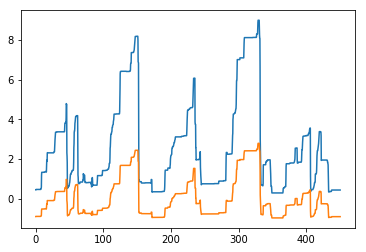

In [40]:
# zscore('TM107')
# %ls C:\Users\kevin\Documents\SourceTree\blink-TS\data

# zscore('C:\\Users\\kevin\\Documents\\SourceTree\\blink-TS\\data\\TM107')
%cd C:\Users\kevin\Documents\SourceTree\blink-TS\data
zscore('TM107')